<center> <h2> DS 3000 - Fall 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> Calculating Startup Funding</h3> </center>
<center><h4>Breanna Madison, Kelley Phippen, Thomas Greenwald</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

Add your summary here (100-150 words)

Provide a brief summary of your project. After reading this executive summary, your readers should have a rough understanding of what you did in this project. You can think of this summary in terms of the four sections of the report and write 1-2 sentences describing each section.

TODO: once project is closer to completion


<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

### Problem Statement

Finding startups is not difficult, but finding great startups is an extremely challenging task. There's the famously thrown around statistic which states that 9 out of 10 startups will fail. While it’s debated how much validity there is to that statement, one thing is for sure, operating a successful startup is HARD. Startups require lots of money to get off the ground and get moving, but investing money in businesses where most fail is a very risky endeavor. This is usually the onus of angel investors and venture capital (VC) firms, who frequently invest in early stage startups. To make this sort of risky investment requires a lot of effort to source potential winners, and conduct due diligence on them to evaluate the opportunity. We want to help make sourcing startups and evaluating them easier and more intelligent, by creating an assortment of machine learning classifiers and predictors. These classifiers will help group potential startups by their market and product fit, and evaluate them based on common traits of those groups. We seek to be able to predict quantifiable attributes of successful startups, like the potential for capital investments. At the end of the day, we want to learn what makes a winner, or even better, a unicorn. 

### Significance of the Problem

Without startups, we would not have companies pushing the boundaries of technology and innovation. We would have no AirBnB, no Instagram, no Uber, no SpaceX, no Tesla. Startups are where new ideas are born, new industries are created, and new markets that we didn’t even know existed yet. Fostering this sort of innovative ecosystem that drives the world forward is an extremely important, not to mention profitable, endeavor. Oftentimes angels and VC firms can make hundreds of times their investment if the company ends up with a big valuation, creating lots of financial incentive to intelligently source startups. In addition, sourcing is mostly a manual process right now, researching startups on newsletters, going to conferences, reaching out to founders on LinkedIn. If there was a tool that helped automate a lot of this work, and narrow down the amount of companies that needed due diligence, it would be a tremendous help to angels and VCs. Oftentimes there will be thousands of potential startups that angels and VCs need to group and explore, and it takes hours and hours of human labor. With our classifiers and predictors it will cut this time down tremendously, allowing them to focus on what matters, the winners. 

### Questions/Hypothesis

- How can we use various metrics such as market, region, founding month, etc. to predict how much total funding a startup will raise?
 
- Can we use linear regression and the aforementioned metrics to make a prediction on funding?

- Can we determine whether Ridge or Lasso regularization will result in a better linear regression model?

- H0: The 11 feature variables (market, country_code, region, funding_rounds, founded_month, founded_quarter, founded_year, seed, venture, round_a, round_b) will NOT have an effect on predicting the total funding amount a startup raises. 

- H1: The 11 feature variables (market, country_code, region, funding_rounds, founded_month, founded_quarter, founded_year, seed, venture, round_a, round_b) will have an effect on predicting the total funding amount a startup raises. 

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
pd.options.mode.chained_assignment = None

## 2. METHOD

### 2.1. Data Acquisition

We obtained this data set from an online source called Kaggle. The link can be found here:https://www.kaggle.com/arindam235/startup-investments-crunchbase. This dataset is a condensed version of Crunchbase’s csv dump. It has 49,438 rows and 39 raw columns (38 feature variables and 1 target).

In [3]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/tommygreenwald/DS3000FP/main/investments_VC_original.csv",
                       encoding="latin")
raw_data.head(5)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.2. Data Analysis

The IVs are the 11 feature varibles which include market, country_code, region, funding_rounds, founded_month, founded_quarter, founded_year, seed, venture, round_a, and round_b. These IVs try to predict the DV of total funding. We chose these variables as predictors because they intuitively seemed to be the most directly correlated with total funding for a startup based on our prior knowledge of venture capital funding. This is a supervised ML problem because we are trying to use these labeled feature variables to *predict* a continuous target variable. Thus, the learning task is a regression problem. We are going to use linear regression with both LASSO (L1) and Ridge (L2) regularization. We are also going to try kNN regression as well as an SVM regression. We felt that these 3 algorithms, with different types of regularization included, will allow us to get a full picture of the data and account for any patterns in the distribution of the data that may cause one model or regularization to perform better than the others. 

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling
In this section, you should do the following and explain why you are doing what you are doing. For each, you should include your code in a cell, followed by a sample output. For instance, if you are one-hot encoding one of your variables, you should first describe what it is and why you are doing it. You should then include your code in a cell, and the sample output should be available as well.




In [4]:
# Perform simple data cleaning (delete extra columns, deal with NA values, etc.)

# First, we are going to drop the feature columns that we do want to use in our regression task. To do this,
# we will just select the ones that we do want.
raw_data = raw_data[[" market ", "country_code", "region", "funding_rounds", "founded_month", "founded_quarter",
                     "founded_year", "seed", "venture", "round_A", "round_B", " funding_total_usd "]]

# Next, we are going to drop the rows where there are null values for any of the feature variables.
raw_data.dropna(inplace=True)
    
# Last, we are going to rename some of the columns with more intuitive feature names.
raw_data.rename(columns={" market ": "market", " funding_total_usd ": "funding_total"}, inplace=True)
data = raw_data

In [5]:
raw_data.head(5)

,market,country_code,region,funding_rounds,founded_month,founded_quarter,founded_year,seed,venture,round_A,round_B,funding_total
0,News,USA,New York City,1.0,2012-06,2012-Q2,2012.0,1750000.0,0.0,0.0,0.0,"17,50,000"
2,Publishing,EST,Tallinn,1.0,2012-10,2012-Q4,2012.0,40000.0,0.0,0.0,0.0,"40,000"
3,Electronics,GBR,London,1.0,2011-04,2011-Q2,2011.0,1500000.0,0.0,0.0,0.0,"15,00,000"
4,Tourism,USA,Dallas,2.0,2014-01,2014-Q1,2014.0,0.0,0.0,0.0,0.0,"60,000"
5,Software,USA,Ft. Lauderdale,1.0,2011-10,2011-Q4,2011.0,0.0,7000000.0,0.0,7000000.0,"70,00,000"


In [6]:
# Perform data wrangling to get your features and target values (e.g., grouping your dataframe by columns, applying functions to format dataframes, etc.)

# First, we are going separate out our features and target into different dataframes.
features = raw_data.drop(columns=["funding_total"])

target = raw_data["funding_total"]

# Next, we are going to apply some functions to format various feature columns.
# Convert floats to ints
int_features = ["funding_rounds", "founded_year", "seed", "venture", "round_A", "round_B"]
for feature in int_features:
    features[feature] = features[feature].apply(np.int64)

# Cut off year from founded month and quarter to get more useful data
year_features = ["founded_month", "founded_quarter"]
for feature in year_features:
    features[feature] = features[feature].apply(lambda x: x[5:])

# Remove unnecessary and weirdly formatted commas from target column
target = target.apply(lambda x: x.replace(",", ""))
clean_features = features
clean_target = target

# Last, we are going to drop the rows where the target variable (funding_total_usd) is not numeric
print(len(features))
idx_to_drop = []
for index in range(len(features)):
    try:
        int(target.iloc[index])
    except:
        idx_to_drop.append(index)
final_idx = [idx for idx in range(len(features.index)) if idx not in idx_to_drop]
features = features.iloc[final_idx]
target = target.iloc[final_idx]
print(len(features))

33829
28884


In [7]:
features.head(5)

,market,country_code,region,funding_rounds,founded_month,founded_quarter,founded_year,seed,venture,round_A,round_B
0,News,USA,New York City,1,06,Q2,2012,1750000,0,0,0
2,Publishing,EST,Tallinn,1,10,Q4,2012,40000,0,0,0
3,Electronics,GBR,London,1,04,Q2,2011,1500000,0,0,0
4,Tourism,USA,Dallas,2,01,Q1,2014,0,0,0,0
5,Software,USA,Ft. Lauderdale,1,10,Q4,2011,0,7000000,0,7000000


In [8]:
target.head(5)

0     1750000 
2       40000 
3     1500000 
4       60000 
5     7000000 
Name: funding_total, dtype: object

In [9]:
# * Preprocess your variables (e.g., scaling/transforming feature variables to normalize them)

# For the numerical features, we are going to use a standard scaler to standardize the data. This will make the
# mean equivalent to 0 and the standard deviation to 1. For the categorical features, we are going to use a label
# encoder to encode the target labels with values between 0 and number of classes. However, a standard scaler must
# be applied on the training and testing data separately or else the results will not be accurate in context of the
# data. The mean and standard deviation need to be for only the data that is contained after the split. Therefore,
# we will split into testing and training sets after the label encoder is applied and before the standard scaler.

columns_to_encode = ["market", "country_code", "region", "funding_rounds", "founded_month",
                        "founded_quarter", "founded_year"]
columns_to_scale = ["seed", "venture", "round_A", "round_B"]

# Encode all data
le = LabelEncoder()
features[columns_to_encode] = features[columns_to_encode].apply(le.fit_transform)
print(features)

# Split into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(features, target)

# Scale all data based on testing and training
scaler = StandardScaler().fit(X_train[columns_to_scale])
X_train_scaled = np.concatenate([scaler.transform(X_train[columns_to_scale]), X_train[columns_to_encode]], axis=1)
X_test_scaled = np.concatenate([scaler.transform(X_test[columns_to_scale]), X_test[columns_to_encode]], axis=1)

       market  country_code  region  funding_rounds  founded_month  \
0         430           102     604               0              5   
2         505            32     824               0              9   
3         195            35     484               0              3   
4         635           102     220               1              0   
5         590           102     299               0              9   
...       ...           ...     ...             ...            ...   
49430      53            68     517               3              0   
49432      53             4     879               0              0   
49433     189            35     484               0              0   
49435     681            41     779               4              4   
49437     216           102     604               3              0   

       founded_quarter  founded_year     seed   venture   round_A   round_B  
0                    1            95  1750000         0         0         0  
2  

In [10]:
X_train_scaled[:3]

array([[ 7.10247461e-01, -2.95123098e-01, -2.75289203e-01,
        -2.28063794e-01,  5.90000000e+02,  1.50000000e+01,
         5.65000000e+02,  3.00000000e+00,  3.00000000e+00,
         1.00000000e+00,  9.60000000e+01],
       [-2.65966010e-01, -1.31089669e-01, -2.75289203e-01,
        -2.28063794e-01,  5.90000000e+02,  1.02000000e+02,
         4.86000000e+02,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  8.30000000e+01],
       [ 6.21500781e-01,  5.96984399e-02, -2.75289203e-01,
        -1.43203343e-01,  5.30000000e+01,  1.02000000e+02,
         2.00000000e+02,  7.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  7.90000000e+01]])

In [11]:
X_test_scaled[:3]

array([[-2.65966010e-01, -1.23145112e-01, -2.75289203e-01,
         4.31532139e-01,  2.84000000e+02,  3.40000000e+01,
         6.55000000e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  8.90000000e+01],
       [-2.65966010e-01,  1.01342188e+00,  1.37681048e+00,
         1.98449425e+00,  2.84000000e+02,  1.02000000e+02,
         6.80000000e+01,  2.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  7.60000000e+01],
       [-2.65966010e-01,  2.78301009e-01, -2.75289203e-01,
        -2.28063794e-01,  2.83000000e+02,  3.40000000e+01,
         5.01000000e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  8.50000000e+01]])

In [12]:
# * Use one feature selection technique to select a subset of your original features

# Construct a RFE with a Decision Tree Regressor to get the top 6 most important features to use on other models
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=6)
rfe.fit(X_train_scaled, y_train)
print(pd.Series(rfe.ranking_, index = features.columns).sort_values())
top = []
for index in range(len(rfe.get_support())):
    if(rfe.get_support()[index]):
        top.append(features.columns[index])
print(top)

country_code       1
founded_month      1
founded_year       1
seed               1
venture            1
round_B            1
founded_quarter    2
funding_rounds     3
market             4
region             5
round_A            6
dtype: int64
['country_code', 'founded_month', 'founded_year', 'seed', 'venture', 'round_B']


### 3.2. Data Exploration
* Generate appropriate data visualizations for your key variables identified in the previous section
* You should have at least three visualizations (and at least two different visualization types)
* For each visualization provide an explanation regarding the variables involved and an interpretation of the graph.
* If you are using Plotly, insert your visualizations as images as well (upload the graph images to an online source, e.g. github, and embed those into the cells in Jupyter Notebook). This is a requirement.


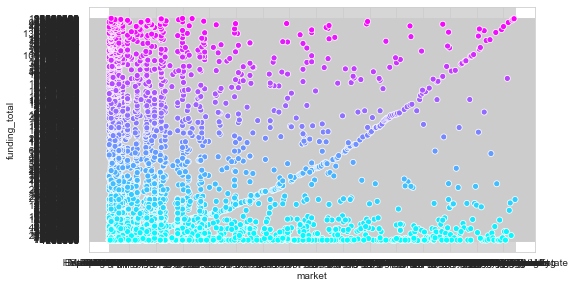

In [13]:
# market x funding total: not really a correlation here 
#WIP need to work on formatting for these 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

clean_features.head(5)

data_features =  ["market", "country_code", "region", "funding_rounds", "founded_month", "founded_quarter",
                     "founded_year", "seed", "venture", "round_A", "round_B"]

clean = clean_features
clean['funding_total'] = clean_target
clean.head(5)
sample_df = clean.sample(frac=0.1, random_state=3000)

plt.figure(figsize=(8, 4.5)) 
sns.scatterplot(data=sample_df, x="market", y="funding_total", hue="funding_total", palette='cool', legend=False)
plt.show()


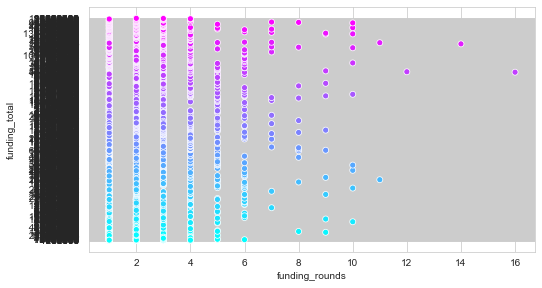

In [14]:
# funding rounds x total funding: 
plt.figure(figsize=(8, 4.5)) 
sns.scatterplot(data=sample_df, x="funding_rounds", y="funding_total", hue="funding_total", palette='cool', legend=False)
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
X = clean["market"]
Y = clean["funding_total"]
X = clean.iloc[:, 2].values.reshape(-1, 1)  # values converts it into a numpy array
Y = clean.iloc[:, 10].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

ValueError: could not convert string to float: 'New York City'

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# #sns.set_theme(style="ticks", color_codes=True)

# sns.catplot(x="market", y="funding_total", data = clean)

### 3.3. Model Construction
* Conduct your hypothesis test(s) here.
* For your machine learning question(s), use the Training, Validation, and Testing approach through GridSearch
* Apply machine learning algorithms (apply at least three different algorithms)
* Train your algorithms

In [16]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

models = {"Linear Regression": LinearRegression(), "Lasso": Lasso(), "Ridge": Ridge(), 
          "Decision Tree Regression": DecisionTreeRegressor(), "Linear SVR": LinearSVR(max_iter=10000)}

for model in models:
    print(model)
    models[model].fit(X_train_scaled, y_train)
    y_pred = models[model].predict(X_train_scaled)
    y_pred_test = models[model].predict(X_test_scaled)
    print("Training MSE: ", mean_squared_error(y_train, y_pred))
    print("Training R2 score: ", r2_score(y_train, y_pred))
    print("Testing MSE: ", mean_squared_error(y_test, y_pred_test))
    print("Testing R2 score: ", r2_score(y_test, y_pred_test))
    print("-"*50)
    

Linear Regression
Training MSE:  4.624034993161766e+16
Training R2 score:  0.038184654107309646
Testing MSE:  2586108453756163.5
Testing R2 score:  0.3663428852774544
--------------------------------------------------
Lasso
Training MSE:  4.624034993161771e+16
Training R2 score:  0.038184654107308647
Testing MSE:  2586108408218173.5
Testing R2 score:  0.366342896435328
--------------------------------------------------
Ridge
Training MSE:  4.624034995471619e+16
Training R2 score:  0.038184653626852305
Testing MSE:  2586085559466887.5
Testing R2 score:  0.36634849491430665
--------------------------------------------------
Decision Tree Regression
Training MSE:  5424671702859.284
Training R2 score:  0.9998871649436487
Testing MSE:  2.553147393693672e+17
Testing R2 score:  -61.55808833537262
--------------------------------------------------
Linear SVR
Training MSE:  4.831892059112975e+16
Training R2 score:  -0.0050503378596093995
Testing MSE:  4269055143630636.0
Testing R2 score:  -0.04

### 3.4. Model Evaluation
* Evaluate the performance of your algorithms on appropriate evaluation metrics, using your **validation set**
    * Use at least two different metrics 
* Evaluate your results from multiple ML models and hypothesis tests
    * What was the performance of each algorithm in plain English? Is there any indication of overfitting/underfitting?
    * Was there a significant difference? Use the template from lecture slides when reporting the results of your hypothesis testing.

For the 5 models we trained, the MSE and R2 score for both the training and testing set was returned. This allowed us to get an idea of how well our models were fitting the data as well as how they were performing in predicting total funding. For linear regression (without regularization), Lasso (L1 regularization), and Ridge (L2 regularization), the results were almost identical, meaning the regularization had little impact on the model performance. On average, the linear regresssion models seemed to perform very poorly on the training data given their MSE and R2 score, and only slightly better on the testing data. It seems the default version of these models is not very fit for our data and prediction task. For the decision tree regression, it performed extremely well on the training data, acheiving an R2 score of almost 1.0 (perfect). However, it performed extremely poorly on the testing data, indicating it is severely overfitting the training data and definitely needs to be tuned in section 3.5. We suspect that fiddling with the max depth will help prevent the severe overfitting. For the linear support vector regression, there was extremely poor performance on both the training and testing data given the MSE and R2 score. This indicates the model may just not be fit to our data very well at all, or needs to be drastically tuned in section 3.5. Based on the hypothesis test we conducted and the results for our preliminary models, we fail to reject the null hypothesis that the 11 feature variables will NOT have an effect on predicting the total funding amount a startup raises. Hopefully after tuning our model hyperparameters in section 3.5, we may be able to reject the null hypothesis. 

### 3.5. Model Optimization
* Tune your models using appropriate hyperparameters
* Explain why you are doing this (e.g., to avoid overfitting, etc.)



In [18]:
from sklearn.model_selection import GridSearchCV

params = {"Linear Regression": {}, "Lasso": {"alpha": [0.1, 1.0, 10.0, 100.0]}, 
          "Ridge": {"alpha": [0.1, 1.0, 10.0, 100.0]}, 
          "Decision Tree Regression": {"max_depth": [2, 6, 10, 20]},
          "Linear SVR": {"C": [0.1, 0.5, 1.0, 5.0, 10.0], "tol": [0.01, 0.001, 0.0001, 0.00001]}}
gscvs = []
for model in models:
    gscv = GridSearchCV(models[model], params[model])
    gscv.fit(X_train_scaled, y_train)
    gscvs.append(gscv)

Based on the results of section 3.3, we knew that we had to tune our model parameters to try to acheive lower MSE and higher R2 scores. For the basic linear regression there was nothing to tune, but for both Lasso (L1) and Ridge (L2) regularization we knew that tuning the alpha value would help to reduce variance in the estimates and hopefully provide better predictions. For the decision tree regression, we knew that tuning the max depth would hopefully prevent overfitting the training data and provide better perfromance on the testing data. For the linear support vector regression, we saw the worst performance out of any of the models. Therefore, we knew we needed to tune multiple parameters, and both the C value and tolerance are very important in determining the strength of the model. 

### 3.6. Model Testing
* Test your tuned algorithms using your **testing set**

In [22]:
for gscv in gscvs:
    print(gscv.estimator)
    y_pred = gscv.predict(X_train_scaled)
    y_pred_test = gscv.predict(X_test_scaled)
    print("Testing MSE: ", mean_squared_error(y_test, y_pred_test))
    print("Testing R2 score: ", r2_score(y_test, y_pred_test))
    print("Best parameters: ", gscv.best_params_)
    print("-"*50)

LinearRegression()
Testing MSE:  2586108453756163.5
Testing R2 score:  0.3663428852774544
Best parameters:  {}
--------------------------------------------------
Lasso()
Testing MSE:  2586103900522950.5
Testing R2 score:  0.3663440009261876
Best parameters:  {'alpha': 100.0}
--------------------------------------------------
Ridge()
Testing MSE:  2584285451405355.5
Testing R2 score:  0.36678956353182823
Best parameters:  {'alpha': 100.0}
--------------------------------------------------
DecisionTreeRegressor()
Testing MSE:  2823656323200000.5
Testing R2 score:  0.3081380960151777
Best parameters:  {'max_depth': 2}
--------------------------------------------------
LinearSVR(max_iter=10000)
Testing MSE:  4234488640295937.0
Testing R2 score:  -0.03754885075995773
Best parameters:  {'C': 10.0, 'tol': 0.01}
--------------------------------------------------


<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
* Interpret your findings from 3.4., 3.5, and 3.6
    * Which algorithms did you compare?
    * Which algorithm(s) revealed best performance?
    * Which algorithm(s) should be used for your predictive model?
    * Based on your findings, can we use the features in your dataset to predict the outcome variable you identified using the algorithms you've applied? (It is okay if the answer is no. We're interested in the process, not the performance of the model.)
* For your hypotheses, interpret the results. What does it mean to have significant/non-significant differences with regards to your data?


* End this section with a conclusion paragraph containing some pointers for future work
    * (e.g., get more data/features, perform another analysis, etc.)

We compared linear regression (normal, Lasso (L1 regularization), Ridge(L2 regularization)), decision tree regression, and linear support vector regression. Even after hyperparameter tuning in section 3.5, linear support vectors revealed the worst performance, indicating they are just not fit for our data and prediction task. Linear regression revealed pretty poor performance even after tuning, fitting very poorly to the training data and having low R2 scores for both training and testing data. The best performing model by far was the decision tree regression, which after tuning was able to maintain high fitting to the training data (acheiving an R2 score of 0.90+) and a decent but not great 0.30 R2 score on the testing data. This indicates that the decision tree regressor should be used for our predictive model, but even still the results are not that promising. Even with trying multiple models and hyperparameter tuning, we were not able to achieve a decent R2 score on the training/testing data. Thus, we conclude that you cannot use the features in our dataset to predict the outcome variable we identified. We think that the features are just not relevant enough to the outcome variable, and there is also simply not enough of them. In order to have a successful predictive model, we think that we would need more, and also more relevant features. 

# TODO: interpret hypothesis testing results (bullet 2)

# TODO: conclusion paragraph (bullet 3)

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
* Describe each team member's contributions to the report (who did what in each section)
* Remember this is a team effort!
* Each member of your team will provide peer evaluation of other team members. Your final grade on the project will be based on those peer evaluations. A survey will be shared after the deadline for this deliverable.